# Credit Card Fraud Detection

In this dataset, we will be creating a binary classification neural network "from scratch" for fraud detection. 

#### 1 Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import random

In [2]:
df = pd.read_csv('creditcard.csv')

# checking if the dataset was loaded
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2 Data Analysis

Before build the neural network, we'll need to analyse the data and check if it has missing values or unbalanced features and then, explore the data.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


By looking at the time feature, we can confirm that there are 284,807 transactions in the period considered in the dataset.

In [4]:
# looking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

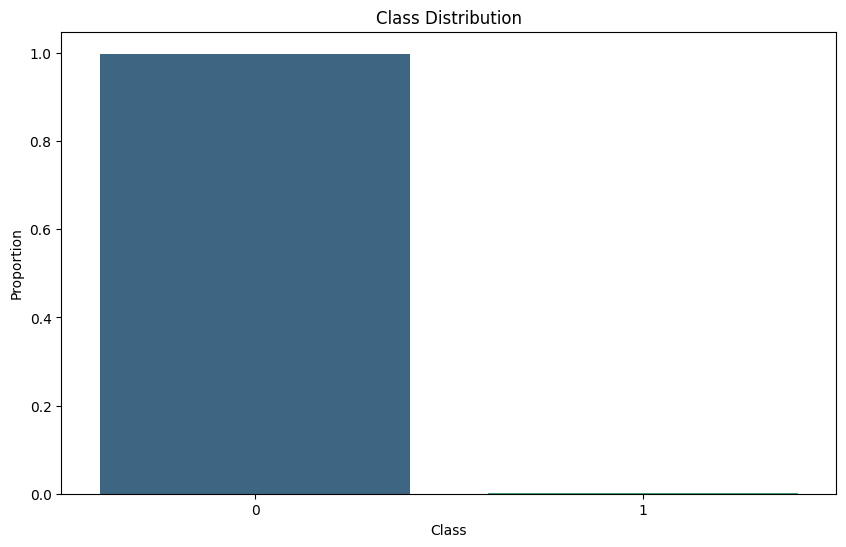

In [5]:
# checking if the dataset is balanced
values = df['Class'].value_counts()/df['Class'].shape[0]
# values = df['Class'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=values.index, y=values.values, hue=values.index, legend=False, palette='viridis')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')

# Display the plot
plt.show()

From the plot above, we can see that the dataset is highly unbalanced

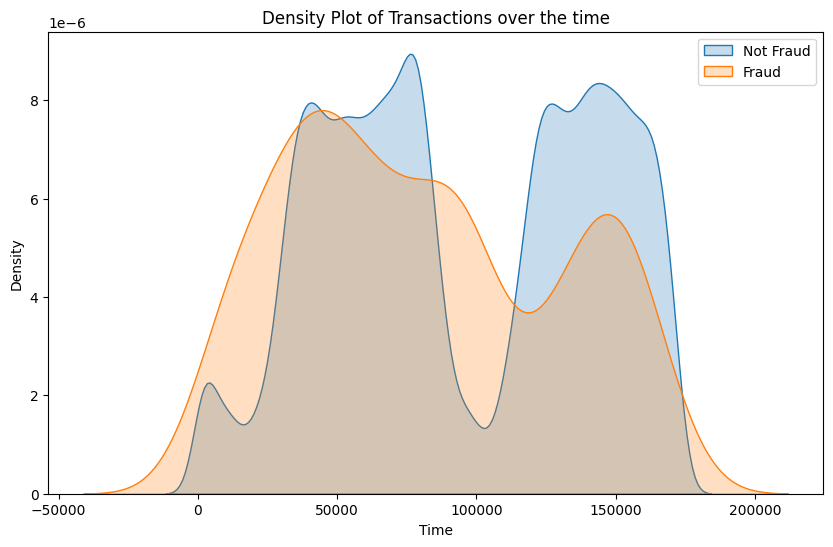

In [6]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

# Plotting the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', fill=True)
sns.kdeplot(class_1, label='Fraud', fill=True)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Density Plot of Transactions over the time')
plt.legend()

# Display the plot
plt.show()

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [7]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


/tmp/ipykernel_299369/3960244505.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0")
/tmp/ipykernel_299369/3960244505.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1")


<Figure size 640x480 with 0 Axes>

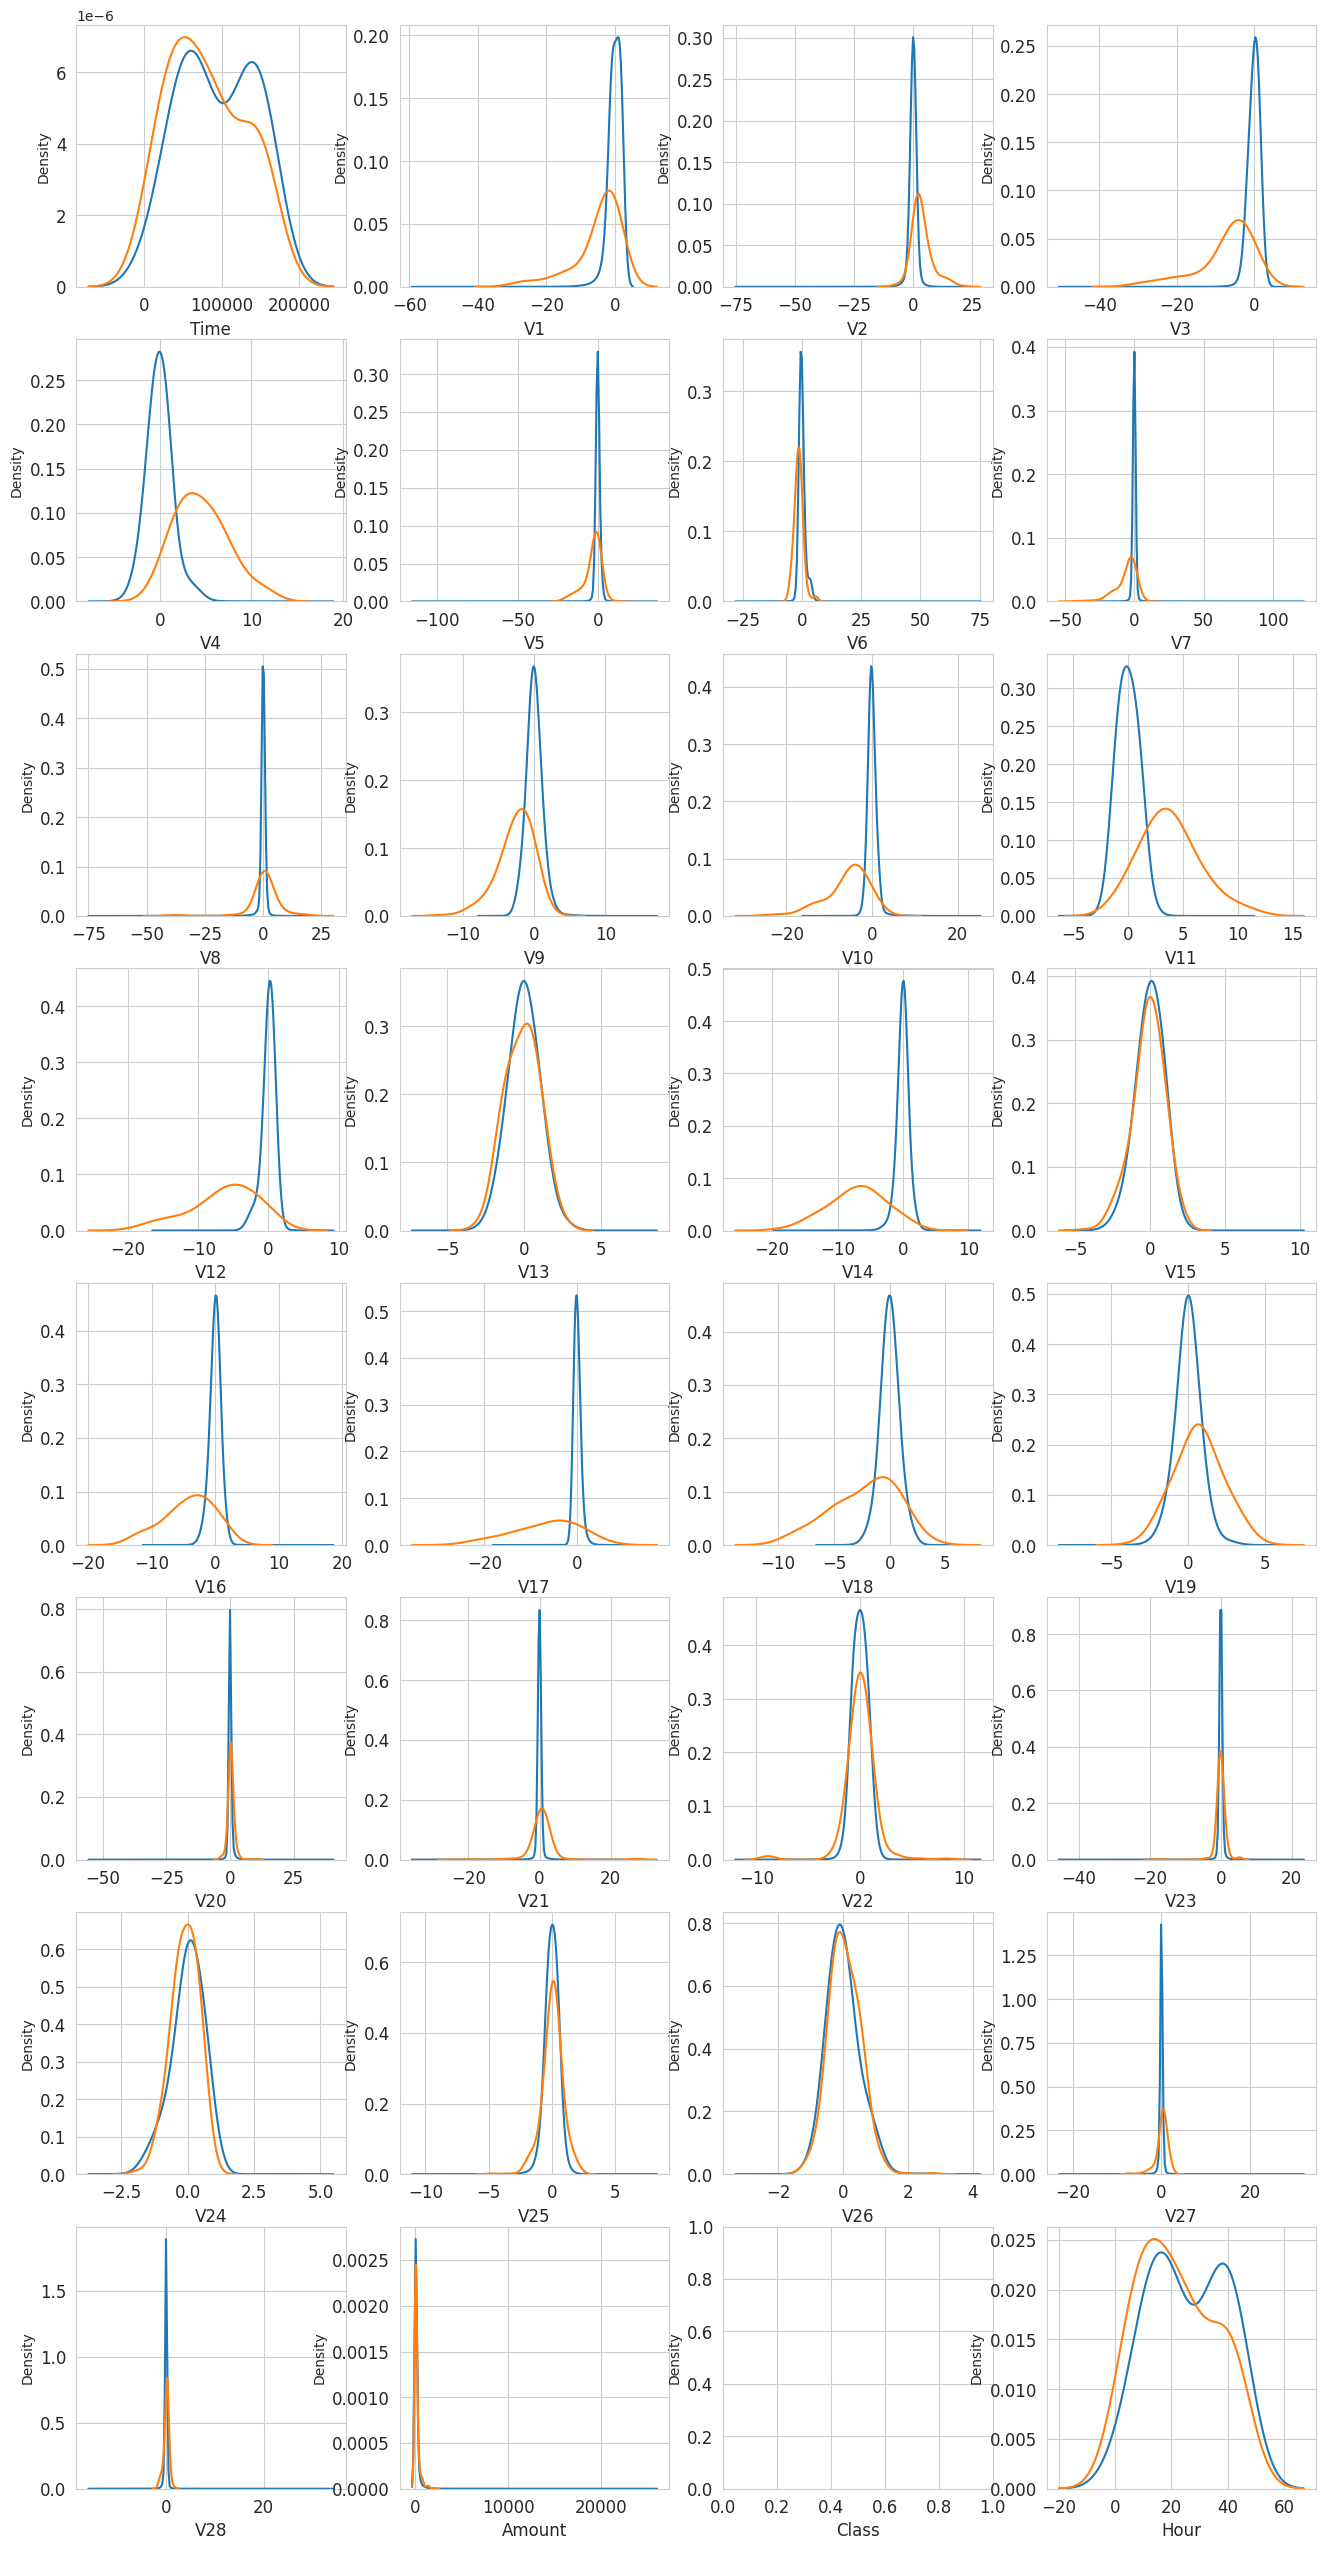

In [8]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,32))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometimes with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have an asymmetric distribution.

#### 3 Building a neural network

##### 3.1 Helper Functions

##### Activation Functions

**ReLu**

The Rectified Linear Unit (ReLU) is a simple, yet highly effective activation function commonly used in Neural Networks.

ReLU sets all negative values of Z to zero, and leaves the positive values unchanged. This non-linear activation function helps Neural Networks model complex non-linear relationships between inputs and outputs, allowing them to learn more complex representations of the data.

In addition to its effectiveness in Neural Networks, ReLU is also computationally efficient and easy to implement.

In [9]:
def relu(Z):
    """
    Implement the ReLU function.

    Arguments:
    Z -- Output of the linear layer

    Returns:
    A -- Post-activation parameter
    cache -- used for backpropagation
    """
    A = np.maximum(0,Z)
    
    return A

**Gradient ReLu**

In [10]:
def relu_backward(dA, Z):
    """
    Implement the backward propagation for a single ReLU unit.

    Arguments:
    dA -- post-activation gradient
    Z -- 'cache' stored for backpropagation

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    dZ = np.array(dA, copy=True) 
    # When z <= 0, dz is equal to 0 as well. 
    dZ[Z <= 0] = 0
    
    return dZ

##### Sigmoid



In [11]:
def sigmoid(Z):
    """
    Implement the Sigmoid function.

    Parameters
    ----------
    Z : the input of the sigmoid function

    Returns
    -------
    A : the result of the sigmoid funcion

    """
    A = 1.0/(1.0+np.exp(-Z))

    return A

In [12]:
def sigmoid_prime(Z):
    """
    Implement the backward propagation for a single sigmoid unit.
    Parameters
    ----------
    Z : the input of the gradient sigmoid function

    Returns
    -------
    the result of the gradient sigmoid funcion
    """

    s = sigmoid(Z)
    
    return s * (1-s)

### 3.2 Defining the Cost Function

In [17]:
def cross_entropy(h_theta, y, num_labels=2):
    m = y.shape[0]
    # avoid division by 0
    epsilon = 1e-6

    loss = -y * np.log(h_theta + epsilon) - (1 - y) * np.log(1 - h_theta + epsilon)

    return loss

def cross_entropy_prime(h_theta, y, num_lables=2):
    m = y.shape[0]
    epsilon = 1e-6

    dJ = (h_theta - y)/ (h_theta * (1 - y) + epsilon)
    return dJ

### 3.3 Building the Neural Network

In [14]:
from utils import FCLayer, ActivationLayer

class NNetwork:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = input_data.shape[0]
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i, :]
            for layer in self.layers:
                output = layer.forward(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = x_train.shape[0]
        # print(f"samples ------------> {samples}")

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                # print(f"j ------------> {j}")
                # print(f"x shape------------> {x_train.shape}")
                output = x_train.iloc[j, :]
                # print(f"output shape------------> {output.shape}")
                for layer in self.layers:
                    output = layer.forward(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train.iloc[j], output)

                # backward propagation
                error = self.loss_prime(y_train.iloc[j], output)
                print(f"error --------> {error}")
                for layer in reversed(self.layers):
                    error = layer.backward(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

After splitting the dataset, we will be instantiating the neural network and defining its hyperparameters.

In [15]:
y = df['Class']
X = df.drop(columns=['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# defining hyperparameters
eta = 0.0001
epochs = 100

In [18]:
net = NNetwork()

net.add(FCLayer(31, 50))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
# net.add(FCLayer(50, 25))
# net.add(ActivationLayer(sigmoid, sigmoid_prime))
# net.add(FCLayer(25, 1))
net.add(FCLayer(50, 1))
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(cross_entropy, cross_entropy_prime)
net.fit(X_train, y_train, epochs=epochs, learning_rate=eta)

# predict
out = net.predict(X_train)
print(out)

error --------> [[-998130.64960966]]


/tmp/ipykernel_299369/3022676325.py:14: RuntimeWarning: overflow encountered in exp
  A = 1.0/(1.0+np.exp(-Z))


ValueError: shapes (31,) and (1,50) not aligned: 31 (dim 0) != 1 (dim 0)

#### References

books:
- http://neuralnetworksanddeeplearning.com/

Articles:
- https://medium.com/@serbanliviu/backpropagation-step-by-step-c8062593db27

Notebooks:
- https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models#Predictive-models
- https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch#Model-Implementation-Helper-Functions